In [1]:
import sys
sys.path.extend(['/home/quic/QUIC-Projects'])


In [5]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import DataFrame, read_csv
import seaborn as sns
%matplotlib inline

In [6]:
data = read_csv('./result/trial5/result.csv')
data

,Unnamed: 0,dataset,circuit_id,layer,num_params,dataset.1,"('accuracy', 'mean')","('accuracy', 'median')","('accuracy', 'std')","('entcap', 'mean')","('expr', 'mean')","('last_cost_avg', 'mean')","('last_cost_avg', 'median')","('last_cost_avg', 'std')","('num_iter', 'mean')","('num_iter', 'median')","('num_iter', 'std')"
0,0,0.0,1.0,1.0,10.0,0.0,0.941406,0.968750,0.051315,1.915431e-32,0.358838,0.138351,0.142941,0.026819,94.125,85.5,33.596078
1,1,0.0,1.0,2.0,20.0,0.0,0.953125,0.968750,0.023623,6.299734e-32,0.285003,0.136639,0.138027,0.023096,76.375,72.5,27.774282
2,2,0.0,1.0,3.0,30.0,0.0,0.945312,0.953125,0.032347,1.120708e-31,0.259123,0.128737,0.124514,0.014801,75.000,69.5,14.947527
3,3,0.0,1.0,4.0,40.0,0.0,0.929688,0.937500,0.036405,1.618543e-31,0.248860,0.128608,0.123806,0.017349,71.750,71.5,20.471234
4,4,0.0,1.0,5.0,50.0,0.0,0.937500,0.953125,0.044194,2.142028e-31,0.250510,0.114966,0.114332,0.006047,75.250,78.5,20.830952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,147,0.0,19.0,4.0,60.0,0.0,0.832031,0.875000,0.226543,7.986218e-01,0.011185,0.119800,0.121410,0.009515,57.375,56.5,6.674846
148,148,0.0,19.0,5.0,75.0,0.0,0.929688,0.921875,0.036405,8.402360e-01,0.008121,0.104917,0.100073,0.020754,84.125,74.0,39.436884
149,149,0.0,19.0,6.0,90.0,0.0,0.957031,0.968750,0.016173,8.670373e-01,0.009570,0.101176,0.098930,0.013965,89.750,84.5,33.737432
150,150,0.0,19.0,7.0,105.0,0.0,0.941406,0.968750,0.042381,8.817542e-01,0.007348,0.108431,0.103703,0.014914,92.625,80.5,36.355143


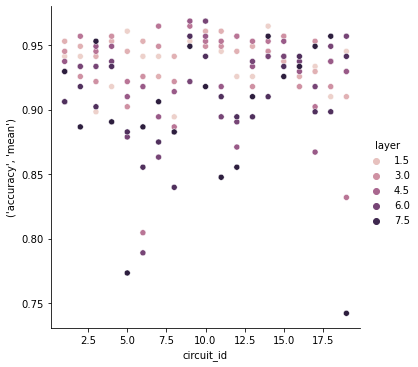

In [16]:
sns.relplot(data=data, x='circuit_id', y="('accuracy', 'mean')", hue="layer")

(0.5, 1.0)

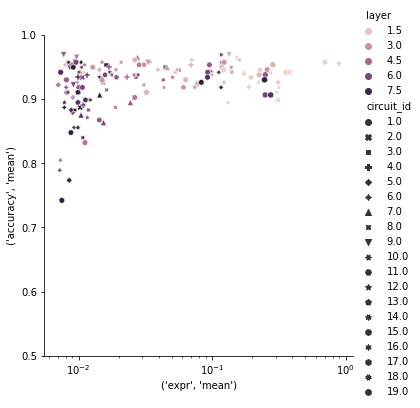

In [41]:
filtered_data = data.loc[(data['circuit_id']==3) | (data['circuit_id']==4)]
sns.relplot(data=data, x="('expr', 'mean')", y="('accuracy', 'mean')", hue='layer', style='circuit_id')
plt.xscale('log')
plt.ylim([0.5, 1])

In [39]:
data['circuit_id']==3

0      False
1      False
2      False
3      False
4      False
       ...  
147    False
148    False
149    False
150    False
151    False
Name: circuit_id, Length: 152, dtype: bool

<AxesSubplot:xlabel='expr', ylabel='num_iter'>

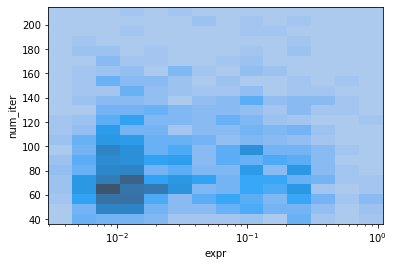

In [103]:
data = read_csv('./result/trial5/data.csv')
sns.histplot(
    data=data,
    x="expr",
    y="num_iter",
    bins='auto',
    log_scale=(True, False),
    thresh=None
)

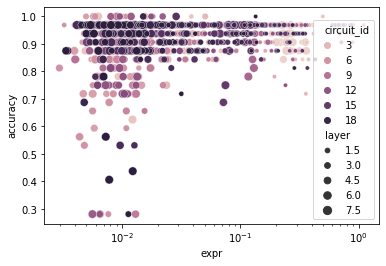

In [66]:
sns.scatterplot(
    data=data,
    x='expr',
    y='accuracy',
    hue='circuit_id',
    size='layer'
)
plt.xscale('log')

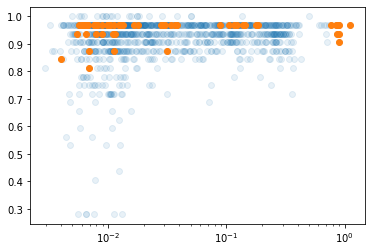

In [81]:
fit_data = data.loc[data['circuit_id']==9]
plt.scatter(x=data['expr'], y=data['accuracy'], alpha=0.1, c='#1f77b4')
plt.scatter(x=fit_data['expr'], y=fit_data['accuracy'], alpha=1, c='#ff7f0e')
plt.xscale('log')

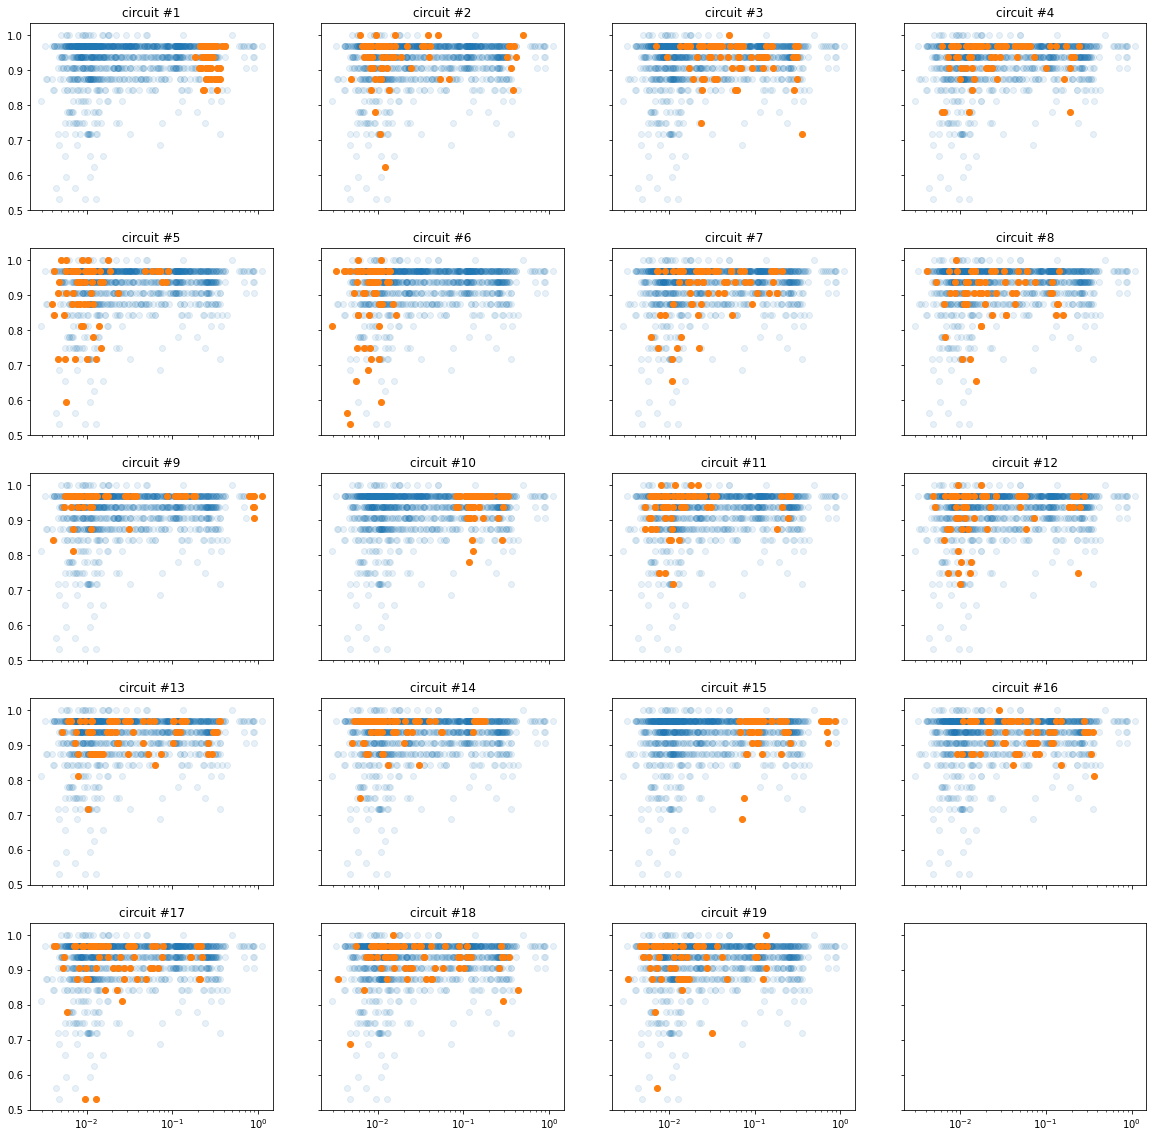

In [99]:
fig, axes = plt.subplots(5, 4, sharex=True, sharey=True, squeeze=True, figsize=(20, 20))
for i in range(1, 19+1):
    fit_data = data.loc[data['circuit_id']==i]
    ax = axes.flatten()[i-1]
    ax.semilogx(data['expr'], data['accuracy'], alpha=0.1, c='#1f77b4', marker='o', linestyle='none')
    ax.semilogx(fit_data['expr'], fit_data['accuracy'], alpha=1, c='#ff7f0e', marker='o', linestyle='none')
    ax.set_title(f'circuit #{i}')
    ax.set_ylim([0.5, None])

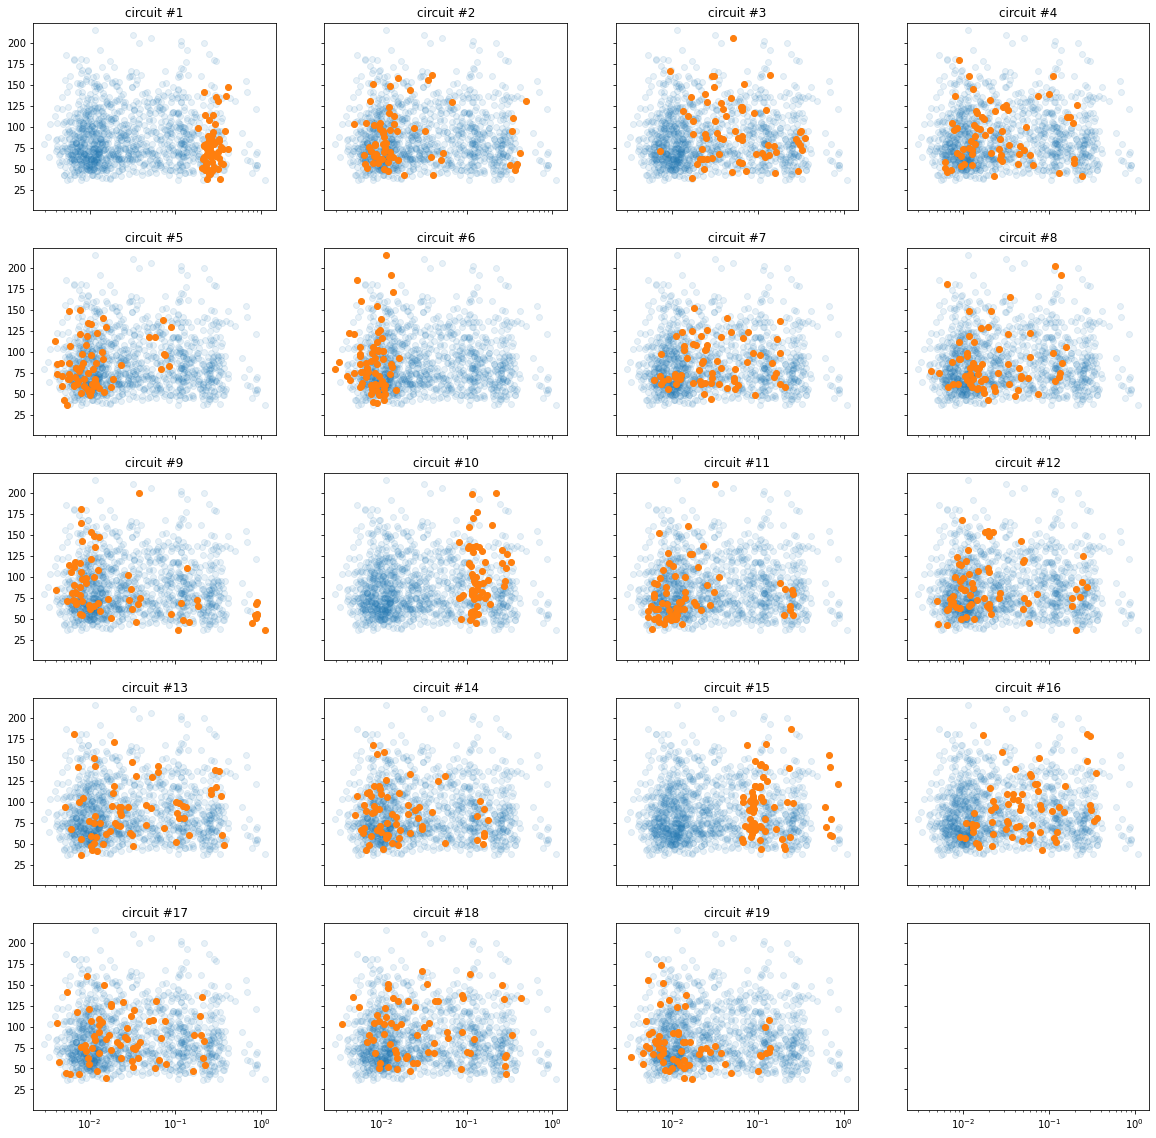

In [100]:
fig, axes = plt.subplots(5, 4, sharex=True, sharey=True, squeeze=True, figsize=(20, 20))
for i in range(1, 19+1):
    fit_data = data.loc[data['circuit_id']==i]
    ax = axes.flatten()[i-1]
    ax.semilogx(data['expr'], data['num_iter'], alpha=0.1, c='#1f77b4', marker='o', linestyle='none')
    ax.semilogx(fit_data['expr'], fit_data['num_iter'], alpha=1, c='#ff7f0e', marker='o', linestyle='none')
    ax.set_title(f'circuit #{i}')
    ax.set_ylim([0.5, None])

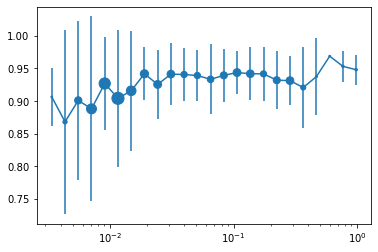

In [160]:
min_expr = min(data['expr'])
max_expr = max(data['expr'])
edges = np.logspace(np.log10(min_expr), np.log10(max_expr), num=25)

expr=[]
acc=[]
acc_std = []
num = []
for i in range(len(edges)-1):
    _data = data.loc[(data['expr']>=edges[i]) & (data['expr']<edges[i+1])]['accuracy']
    expr.append(edges[i]/2+edges[i+1]/2)
    acc.append(np.mean(_data))
    acc_std.append(np.std(_data))
    num.append(len(_data))

plt.errorbar(expr, acc, yerr=acc_std)
plt.scatter(expr, acc, s=num)
plt.xscale('log')

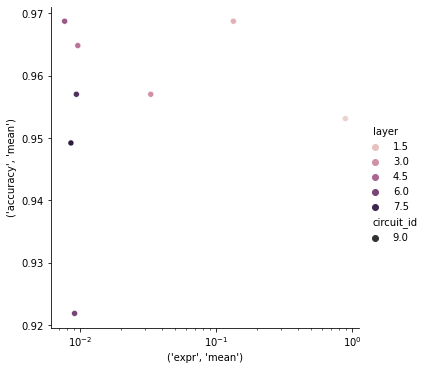

In [4]:
from pandas import read_csv
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
result = read_csv('./result/trial5/result.csv')
sns.relplot(
    data=result.loc[result['circuit_id']==9],
    x="('expr', 'mean')",
    hue="layer",
    y="('accuracy', 'mean')",
    style='circuit_id'
)
plt.xscale('log')